In [1]:
"""
 * Generate a grayscale histogram for an image.
 *
 * Usage: python GrayscaleHistogram.py <fiilename>
"""
import sys
import numpy as np
import skimage.color
import skimage.io
import skimage.viewer
import cv2
from skimage.io import imread_collection
from matplotlib import pyplot as plt

/Users/arpit/opt/anaconda3/lib/python3.8/site-packages/skimage/viewer/utils/__init__.py:1: UserWarning: Recommended matplotlib backend is `Agg` for full skimage.viewer functionality.
  from .core import *


# Grayscale plot of single image

In [2]:
path = '/Users/arpit/Desktop/GAN/Generated_Paintings/1.png'
# read the image as grayscale from the outset
image = skimage.io.imread(fname=path, as_gray=True)
# display the image
viewer_gray = skimage.viewer.ImageViewer(image)
#viewer_gray.show()

In [3]:
histogram, bin_edges = np.histogram(image, bins=256, range=(0, 1))

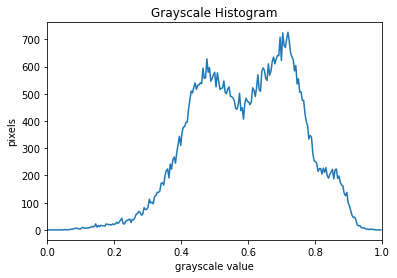

In [4]:
# configure and draw the histogram figure
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("grayscale value")
plt.ylabel("pixels")
plt.xlim([0.0, 1.0])  # <- named arguments do not work here

plt.plot(bin_edges[0:-1], histogram)  # <- or here
plt.show()

# RGB Plot fo single image

In [5]:
# read original image, in full color, based on command
# line argument
image = skimage.io.imread(fname=path)

# display the image
viewer_color = skimage.viewer.ImageViewer(image)
viewer_color.show()

[]

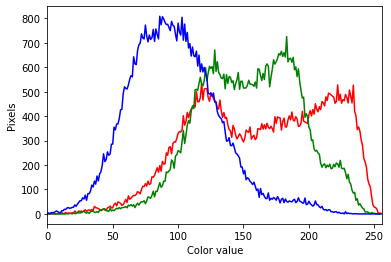

In [6]:
# tuple to select colors of each channel line
colors = ("r", "g", "b")
channel_ids = (0, 1, 2)

# create the histogram plot, with three lines, one for
# each color
plt.xlim([0, 256])
for channel_id, c in zip(channel_ids, colors):
    histogram, bin_edges = np.histogram(
        image[:, :, channel_id], bins=256, range=(0, 256)
    )
    plt.plot(bin_edges[0:-1], histogram, color=c)

plt.xlabel("Color value")
plt.ylabel("Pixels")

plt.show()

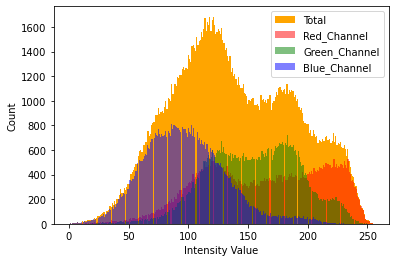

In [7]:
#RGB WITH TOTAL PLOT
_ = plt.hist(image.ravel(), bins = 256, color = 'orange', )
_ = plt.hist(image[:, :, 0].ravel(), bins = 256, color = 'red', alpha = 0.5)
_ = plt.hist(image[:, :, 1].ravel(), bins = 256, color = 'Green', alpha = 0.5)
_ = plt.hist(image[:, :, 2].ravel(), bins = 256, color = 'Blue', alpha = 0.5)
_ = plt.xlabel('Intensity Value')
_ = plt.ylabel('Count')
_ = plt.legend(['Total', 'Red_Channel', 'Green_Channel', 'Blue_Channel'])
plt.show()

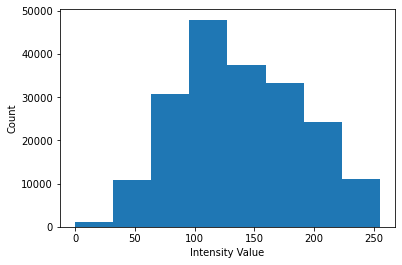

In [8]:
# Histogram plot
_ = plt.hist(image.ravel(), bins = 8 )
_ = plt.xlabel('Intensity Value')
_ = plt.ylabel('Count')
plt.show()

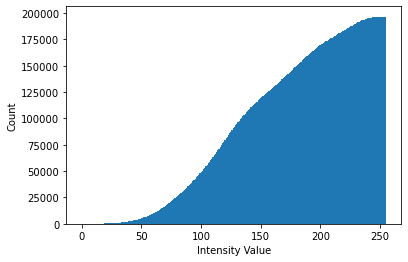

In [9]:
# Cumulative Histogram
_ = plt.hist(image.ravel(), bins = 256, cumulative = True)
_ = plt.xlabel('Intensity Value')
_ = plt.ylabel('Count') 
plt.show()

In [10]:
show_grayscale_equalized(image)

NameError: name 'show_grayscale_equalized' is not defined

In [11]:
#RGB WITH TOTAL PLOT
_ = plt.hist(show_grayscale_equalized(image).ravel(), bins = 256, color = 'orange', )
_ = plt.hist(image.ravel(), bins = 256, color = 'gray', alpha = 0.5)
_ = plt.xlabel('Intensity Value')
_ = plt.ylabel('Count')
_ = plt.legend(['Total', 'Gray_Scale'])
plt.show()

NameError: name 'show_grayscale_equalized' is not defined

In [12]:
#RGB WITH TOTAL PLOT
_ = plt.hist(show_rgb_equalized(image).ravel(), bins = 256, color = 'orange', )
_ = plt.hist(image[:, :, 0].ravel(), bins = 256, color = 'red', alpha = 0.5)
_ = plt.hist(image[:, :, 1].ravel(), bins = 256, color = 'Green', alpha = 0.5)
_ = plt.hist(image[:, :, 2].ravel(), bins = 256, color = 'Blue', alpha = 0.5)
_ = plt.xlabel('Intensity Value')
_ = plt.ylabel('Count')
_ = plt.legend(['Total', 'Red_Channel', 'Green_Channel', 'Blue_Channel'])
plt.show()

NameError: name 'show_rgb_equalized' is not defined

# 17.02.2021 (Continue)

[[182.2383651  179.35522926 124.99158509]
 [ 76.3204962   87.10794297  46.97148676]
 [148.41165276 147.01427317  93.78341385]
 [222.07986406 214.03653356 156.86094591]
 [219.34035279 177.09441293  91.76066516]
 [114.59291085 120.4981203   74.20173201]]


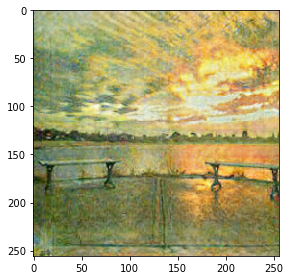

In [14]:
import numpy as np
from skimage import io
from sklearn.cluster import KMeans

original = io.imread('/Users/arpit/Desktop/GAN/Generated_Paintings/1.png')
n_colors = 6

arr = original.reshape((-1, 3))
kmeans = KMeans(n_clusters=n_colors, random_state=42).fit(arr)
labels = kmeans.labels_
centers = kmeans.cluster_centers_
print(centers)
less_colors = centers[labels].reshape(original.shape).astype('uint8')


io.imshow(original)


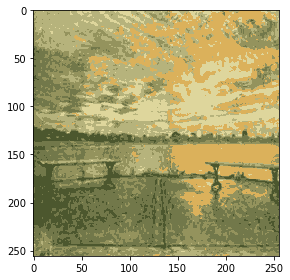

In [15]:
io.imshow(less_colors)

In [16]:
def rgb_plot(image):
    # tuple to select colors of each channel line
    colors = ("r", "g", "b")
    channel_ids = (0, 1, 2)
    # create the histogram plot, with three lines, one for
    # each color
    plt.xlim([0, 256])
    for channel_id, c in zip(channel_ids, colors):
        histogram, bin_edges = np.histogram(
            image[:, :, channel_id], bins=256, range=(0, 256)
        )
        plt.plot(bin_edges[0:-1], histogram, color=c)
    plt.xlabel("Color value")
    plt.ylabel("Pixels")
    plt.show()

In [17]:
def color_quantization(original):
    #original = io.imread(path)
    n_colors = 256
    arr = original.reshape((-1, 3))
    kmeans = KMeans(n_clusters=n_colors, random_state=42).fit(arr)
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    less_colors = centers[labels].reshape(original.shape).astype('uint8')
    return less_colors

In [18]:
col = imread_collection('/Users/arpit/Desktop/GAN/Dataset/Paint_Fake_Test/*.png')

In [19]:
len(col)

751

In [30]:
temp = []
for i in col:
     temp.append(color_quantization(i))

KeyboardInterrupt: 

In [31]:
len(temp)

0

In [32]:
temp[0]

IndexError: list index out of range

In [23]:
io.imshow(temp[0])

IndexError: list index out of range

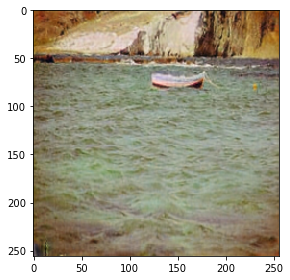

In [24]:
io.imshow(col[0])

In [25]:
rgb_plot(temp[2])

IndexError: list index out of range

In [26]:
labels

array([3, 0, 0, ..., 2, 2, 2], dtype=int32)

In [27]:
temp[0]

IndexError: list index out of range

In [28]:
centers

array([[182.2383651 , 179.35522926, 124.99158509],
       [ 76.3204962 ,  87.10794297,  46.97148676],
       [148.41165276, 147.01427317,  93.78341385],
       [222.07986406, 214.03653356, 156.86094591],
       [219.34035279, 177.09441293,  91.76066516],
       [114.59291085, 120.4981203 ,  74.20173201]])

In [29]:
(set(temp[0].flatten()))

IndexError: list index out of range

In [ ]:
img = temp[0]

In [ ]:
img = img.reshape(-1, img.shape[2])

In [ ]:
print (img.shape)

In [ ]:
counter = np.unique(img, axis=0)
# n unique colors (3 values per pixel)
print (counter.shape)

In [ ]:
counter

In [ ]:
un = []
for img in temp:
    img = img.reshape(-1, img.shape[2])
    counter = np.unique(img, axis=0)
    un.append(counter)

In [ ]:
unique_colors = np.unique(un, axis=0)

In [ ]:
unique_colors

In [ ]:
flat_list = [item for sublist in unique_colors for item in sublist]

In [ ]:
len(flat_list)

In [ ]:
flat_list[1]

In [ ]:
unique_list = np.unique(flat_list,axis=0)

In [ ]:
len(unique_list)

In [ ]:
unique_list 

In [154]:
np.unique(temp[0],axis=)

array([[[ 31,  18,  16],
        [ 44,  26,  18],
        [ 44,  26,  18],
        ...,
        [212, 196, 158],
        [214, 199, 168],
        [215, 198, 178]],

       [[ 44,  36,  36],
        [ 31,  18,  16],
        [ 31,  18,  16],
        ...,
        [209, 192, 144],
        [193, 177, 153],
        [183, 160, 150]],

       [[ 44,  36,  36],
        [ 31,  18,  16],
        [ 31,  18,  16],
        ...,
        [209, 192, 144],
        [150, 119, 104],
        [127, 106,  85]],

       ...,

       [[148, 129,  96],
        [148, 129,  96],
        [148, 129,  96],
        ...,
        [119,  91,  65],
        [147, 137, 114],
        [143, 132, 109]],

       [[148, 129,  96],
        [160, 132, 100],
        [160, 132, 100],
        ...,
        [114,  87,  59],
        [153, 134, 108],
        [153, 134, 108]],

       [[160, 132, 100],
        [166, 144, 101],
        [166, 144, 101],
        ...,
        [114,  87,  59],
        [153, 134, 108],
        [143, 132, 109]]

In [155]:
flat_list = [item for sublist in temp[0] for item in sublist]

In [156]:
np.unique(flat_list,axis=0)

array([[ 14,  10,  15],
       [ 31,  18,  16],
       [ 44,  26,  18],
       [ 44,  36,  36],
       [ 56,  31,  19],
       [ 58,  42,  28],
       [ 61,  49,  44],
       [ 69,  38,  22],
       [ 73,  57,  28],
       [ 73,  59,  55],
       [ 77,  47,  35],
       [ 80,  42,  20],
       [ 82,  65,  37],
       [ 86,  70,  69],
       [ 87,  51,  29],
       [ 87,  70,  51],
       [ 92,  64,  28],
       [ 93,  55,  40],
       [ 93,  79,  43],
       [ 93,  79,  77],
       [ 93,  82,  56],
       [ 94,  49,  18],
       [ 94,  68,  39],
       [ 98,  90,  85],
       [ 99,  89,  64],
       [100,  56,  29],
       [100,  97,  69],
       [101,  70,  49],
       [103,  69,  39],
       [103,  91,  52],
       [104, 106,  82],
       [105,  86,  36],
       [106,  78,  46],
       [106, 109,  92],
       [107,  85,  71],
       [107,  98,  92],
       [107, 111,  69],
       [108,  81,  55],
       [108,  90,  85],
       [109,  97,  74],
       [110, 118,  85],
       [111,  98

# 19.02.2021 (For Single Image)

In [33]:
def flat_list(unique_colors):
    flat_list = [item for sublist in unique_colors for item in sublist]
    return flat_list

In [34]:
single_quant = color_quantization(col[0])

In [35]:
flat_single = flat_list(single_quant)

In [36]:
np.unique(flat_single,axis=0)

array([[ 14,  10,  15],
       [ 31,  18,  16],
       [ 44,  26,  18],
       [ 44,  36,  36],
       [ 56,  31,  19],
       [ 58,  42,  28],
       [ 61,  49,  44],
       [ 69,  38,  22],
       [ 73,  57,  28],
       [ 73,  59,  55],
       [ 77,  47,  35],
       [ 80,  42,  20],
       [ 82,  65,  37],
       [ 86,  70,  69],
       [ 87,  51,  29],
       [ 87,  70,  51],
       [ 92,  64,  28],
       [ 93,  55,  40],
       [ 93,  79,  43],
       [ 93,  79,  77],
       [ 93,  82,  56],
       [ 94,  49,  18],
       [ 94,  68,  39],
       [ 98,  90,  85],
       [ 99,  89,  64],
       [100,  56,  29],
       [100,  97,  69],
       [101,  70,  49],
       [103,  69,  39],
       [103,  91,  52],
       [104, 106,  82],
       [105,  86,  36],
       [106,  78,  46],
       [106, 109,  92],
       [107,  85,  71],
       [107,  98,  92],
       [107, 111,  69],
       [108,  81,  55],
       [108,  90,  85],
       [109,  97,  74],
       [110, 118,  85],
       [111,  98

In [37]:
#Unique values in original image
len(np.unique(flat_list(col[0]),axis =0))

46801

In [38]:
#Unique values after quantisation 
len(np.unique(flat_single,axis=0))

256

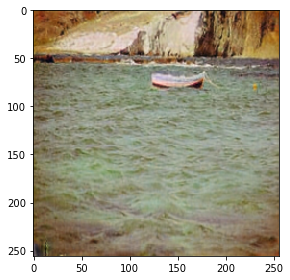

In [39]:
#Original Image
io.imshow(col[0])

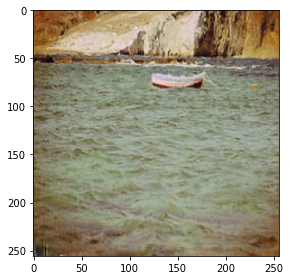

In [40]:
#After Quantisation 
io.imshow(single_quant)

In [41]:
#Quantisaton of single image
len_quant = np.unique(flat_single,axis=0)

In [42]:
len(len_quant)

256

In [43]:
flat_single[0]

array([133,  87,  22], dtype=uint8)

In [44]:
from skimage import color

In [45]:
lab_color = color.rgb2lab(flat_single[0])

In [46]:
lab_color

array([40.99614097, 13.43224019, 42.57021328])

In [52]:
original = col[0]
n_colors = 256
arr = original.reshape((-1, 3))
kmeans = KMeans(n_clusters=n_colors, random_state=42).fit(arr)
labels = kmeans.labels_
centers = kmeans.cluster_centers_
less_colors = centers[labels].reshape(original.shape).astype('uint8')